# **1. Perkenalan Dataset**


Tahap pertama, Anda harus mencari dan menggunakan dataset **tanpa label** dengan ketentuan sebagai berikut:

1. **Sumber Dataset**:  
   Dataset dapat diperoleh dari berbagai sumber, seperti public repositories (*Kaggle*, *UCI ML Repository*, *Open Data*) atau data primer yang Anda kumpulkan sendiri.
   
2. **Ketentuan Dataset**:
   - **Tanpa label**: Dataset tidak boleh memiliki label atau kelas.
   - **Jumlah Baris**: Minimal 1000 baris untuk memastikan dataset cukup besar untuk analisis yang bermakna.
   - **Tipe Data**: Harus mengandung data **kategorikal** dan **numerikal**.
     - *Kategorikal*: Misalnya jenis kelamin, kategori produk.
     - *Numerikal*: Misalnya usia, pendapatan, harga.

3. **Pembatasan**:  
   Dataset yang sudah digunakan dalam latihan clustering (seperti customer segmentation) tidak boleh digunakan.

# **2. Import Library**

Pada tahap ini, Anda perlu mengimpor beberapa pustaka (library) Python yang dibutuhkan untuk analisis data dan pembangunan model machine learning.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno
from scipy.stats import zscore
import itertools
from sklearn.preprocessing import RobustScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.feature_selection import SelectKBest, f_classif

# **3. Memuat Dataset**

Pada tahap ini, Anda perlu memuat dataset ke dalam notebook. Jika dataset dalam format CSV, Anda bisa menggunakan pustaka pandas untuk membacanya. Pastikan untuk mengecek beberapa baris awal dataset untuk memahami strukturnya dan memastikan data telah dimuat dengan benar.

Jika dataset berada di Google Drive, pastikan Anda menghubungkan Google Drive ke Colab terlebih dahulu. Setelah dataset berhasil dimuat, langkah berikutnya adalah memeriksa kesesuaian data dan siap untuk dianalisis lebih lanjut.

In [2]:
data_asli = pd.read_csv("/content/bank_transactions_data_2.csv")

# **4. Exploratory Data Analysis (EDA)**

Pada tahap ini, Anda akan melakukan **Exploratory Data Analysis (EDA)** untuk memahami karakteristik dataset. EDA bertujuan untuk:

1. **Memahami Struktur Data**
   - Tinjau jumlah baris dan kolom dalam dataset.  
   - Tinjau jenis data di setiap kolom (numerikal atau kategorikal).

2. **Menangani Data yang Hilang**  
   - Identifikasi dan analisis data yang hilang (*missing values*). Tentukan langkah-langkah yang diperlukan untuk menangani data yang hilang, seperti pengisian atau penghapusan data tersebut.

3. **Analisis Distribusi dan Korelasi**  
   - Analisis distribusi variabel numerik dengan statistik deskriptif dan visualisasi seperti histogram atau boxplot.  
   - Periksa hubungan antara variabel menggunakan matriks korelasi atau scatter plot.

4. **Visualisasi Data**  
   - Buat visualisasi dasar seperti grafik distribusi dan diagram batang untuk variabel kategorikal.  
   - Gunakan heatmap atau pairplot untuk menganalisis korelasi antar variabel.

Tujuan dari EDA adalah untuk memperoleh wawasan awal yang mendalam mengenai data dan menentukan langkah selanjutnya dalam analisis atau pemodelan.

### 1. Memahami Struktur Data

In [3]:
data_asli.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2512 entries, 0 to 2511
Data columns (total 16 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   TransactionID            2512 non-null   object 
 1   AccountID                2512 non-null   object 
 2   TransactionAmount        2512 non-null   float64
 3   TransactionDate          2512 non-null   object 
 4   TransactionType          2512 non-null   object 
 5   Location                 2512 non-null   object 
 6   DeviceID                 2512 non-null   object 
 7   IP Address               2512 non-null   object 
 8   MerchantID               2512 non-null   object 
 9   Channel                  2512 non-null   object 
 10  CustomerAge              2512 non-null   int64  
 11  CustomerOccupation       2512 non-null   object 
 12  TransactionDuration      2512 non-null   int64  
 13  LoginAttempts            2512 non-null   int64  
 14  AccountBalance          

In [4]:
data_asli.head()

,TransactionID,AccountID,TransactionAmount,TransactionDate,TransactionType,Location,DeviceID,IP Address,MerchantID,Channel,CustomerAge,CustomerOccupation,TransactionDuration,LoginAttempts,AccountBalance,PreviousTransactionDate
0,TX000001,AC00128,14.09,2023-04-11 16:29:14,Debit,San Diego,D000380,162.198.218.92,M015,ATM,70,Doctor,81,1,5112.21,2024-11-04 08:08:08
1,TX000002,AC00455,376.24,2023-06-27 16:44:19,Debit,Houston,D000051,13.149.61.4,M052,ATM,68,Doctor,141,1,13758.91,2024-11-04 08:09:35
2,TX000003,AC00019,126.29,2023-07-10 18:16:08,Debit,Mesa,D000235,215.97.143.157,M009,Online,19,Student,56,1,1122.35,2024-11-04 08:07:04
3,TX000004,AC00070,184.50,2023-05-05 16:32:11,Debit,Raleigh,D000187,200.13.225.150,M002,Online,26,Student,25,1,8569.06,2024-11-04 08:09:06
4,TX000005,AC00411,13.45,2023-10-16 17:51:24,Credit,Atlanta,D000308,65.164.3.100,M091,Online,26,Student,198,1,7429.40,2024-11-04 08:06:39


### 2. Menangani Data yang Hilang

In [5]:
missing_values = data_asli.isnull().sum()
print("Missing Values:\n", missing_values)

Missing Values:
 TransactionID              0
AccountID                  0
TransactionAmount          0
TransactionDate            0
TransactionType            0
Location                   0
DeviceID                   0
IP Address                 0
MerchantID                 0
Channel                    0
CustomerAge                0
CustomerOccupation         0
TransactionDuration        0
LoginAttempts              0
AccountBalance             0
PreviousTransactionDate    0
dtype: int64


<Axes: >

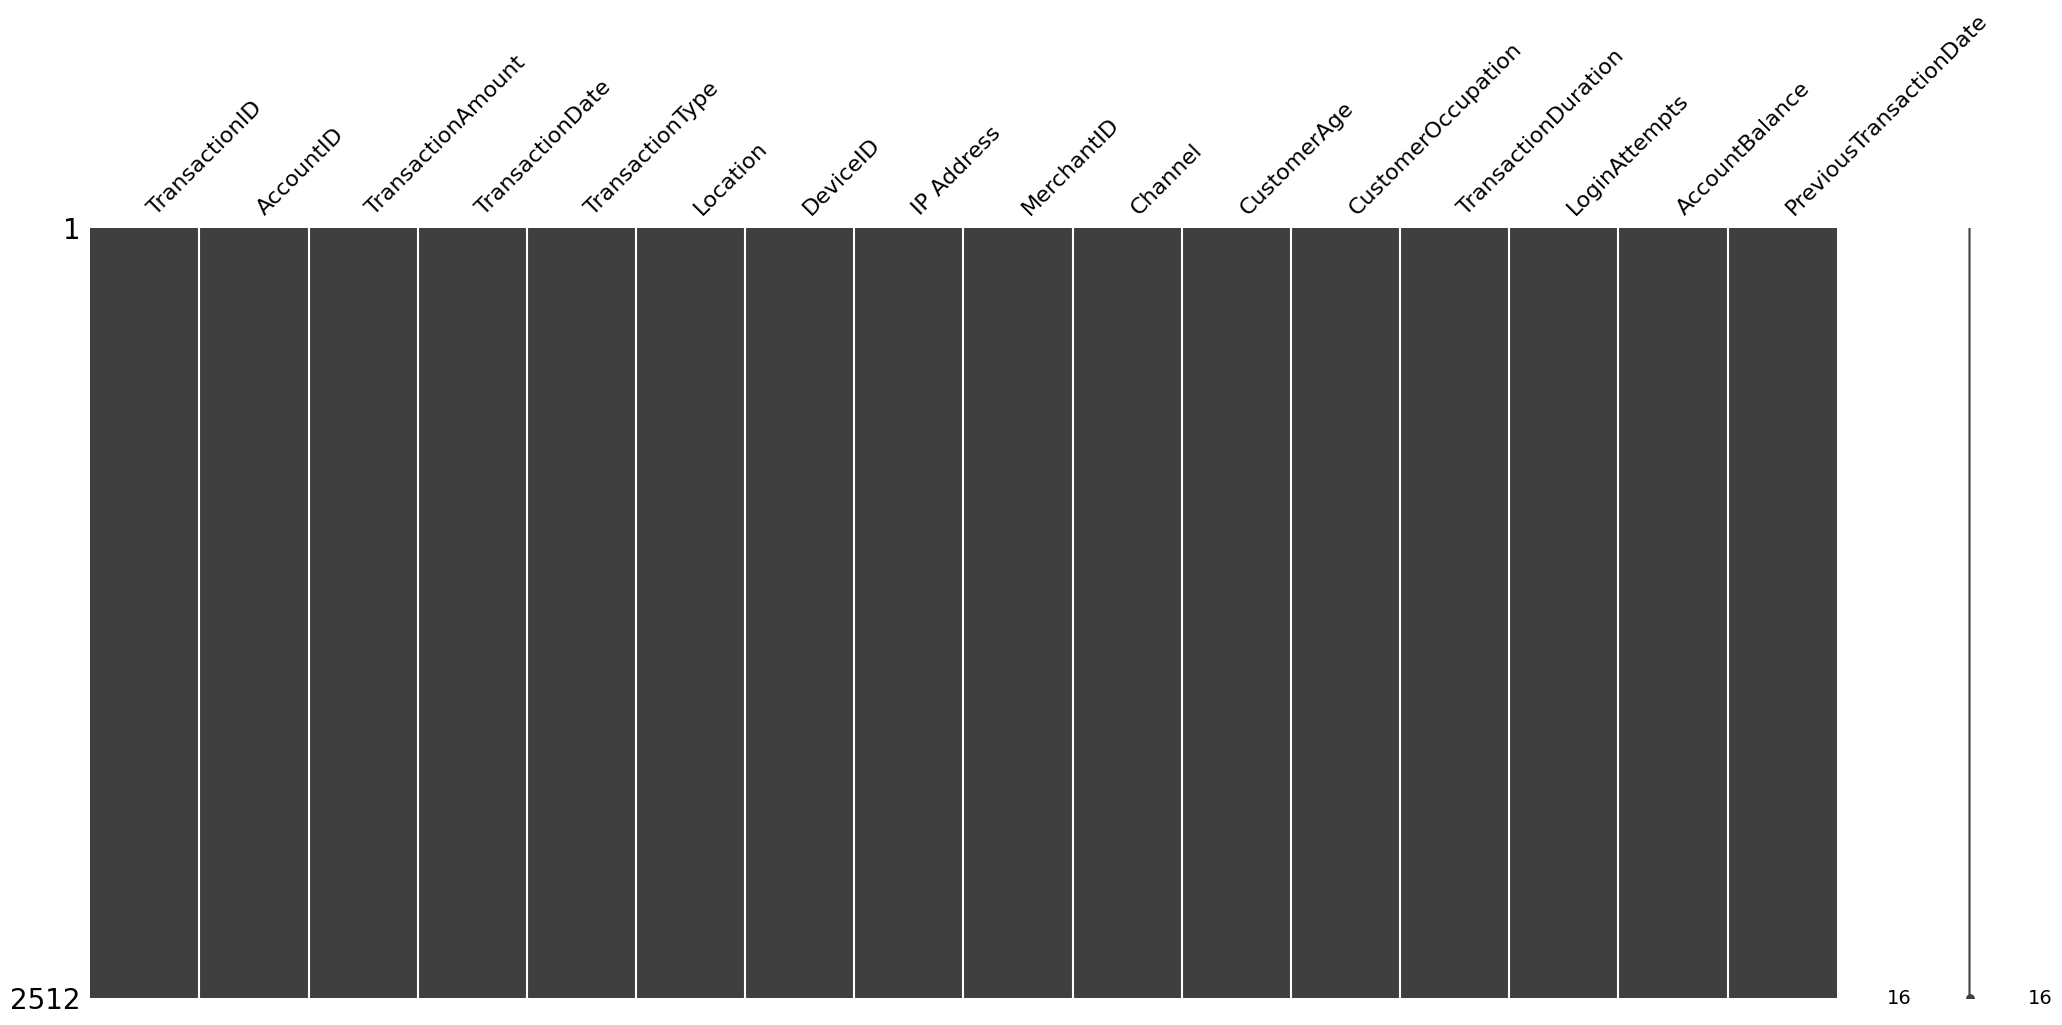

In [6]:
msno.matrix(data_asli)

In [7]:
data_asli.duplicated().sum()

np.int64(0)

### 3. Analisis Distribusi dan Korelasi

In [8]:
print(data_asli.describe())

       TransactionAmount  CustomerAge  TransactionDuration  LoginAttempts  \
count        2512.000000  2512.000000          2512.000000    2512.000000   
mean          297.593778    44.673965           119.643312       1.124602   
std           291.946243    17.792198            69.963757       0.602662   
min             0.260000    18.000000            10.000000       1.000000   
25%            81.885000    27.000000            63.000000       1.000000   
50%           211.140000    45.000000           112.500000       1.000000   
75%           414.527500    59.000000           161.000000       1.000000   
max          1919.110000    80.000000           300.000000       5.000000   

       AccountBalance  
count     2512.000000  
mean      5114.302966  
std       3900.942499  
min        101.250000  
25%       1504.370000  
50%       4735.510000  
75%       7678.820000  
max      14977.990000  


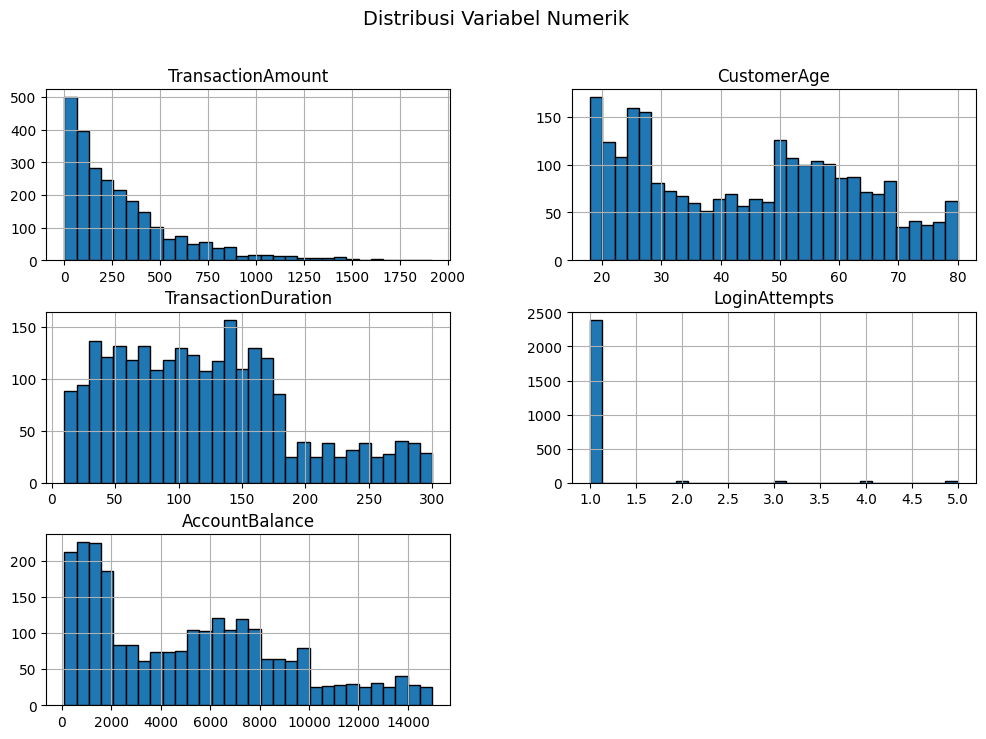

In [9]:
data_asli.hist(figsize=(12, 8), bins=30, edgecolor='black')
plt.suptitle('Distribusi Variabel Numerik', fontsize=14)
plt.show()

In [10]:
num_cols = ['TransactionAmount', 'AccountBalance', 'CustomerAge', 'TransactionDuration', 'LoginAttempts']

In [11]:
z_scores = data_asli[num_cols].apply(zscore)

threshold = 3
outliers = (np.abs(z_scores) > threshold)

outlier_counts = outliers.sum()
print("Jumlah Outlier per Kolom:\n", outlier_counts)

Jumlah Outlier per Kolom:
 TransactionAmount      48
AccountBalance          0
CustomerAge             0
TransactionDuration     0
LoginAttempts          95
dtype: int64


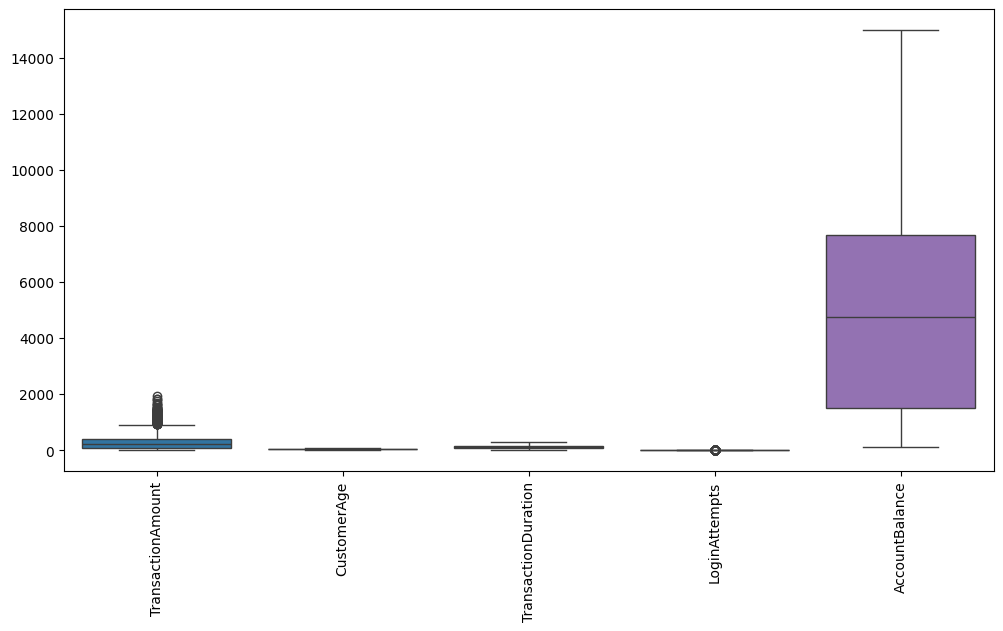

In [12]:
plt.figure(figsize=(12, 6))
sns.boxplot(data=data_asli.select_dtypes(include=['number']))
plt.xticks(rotation=90)
plt.show()

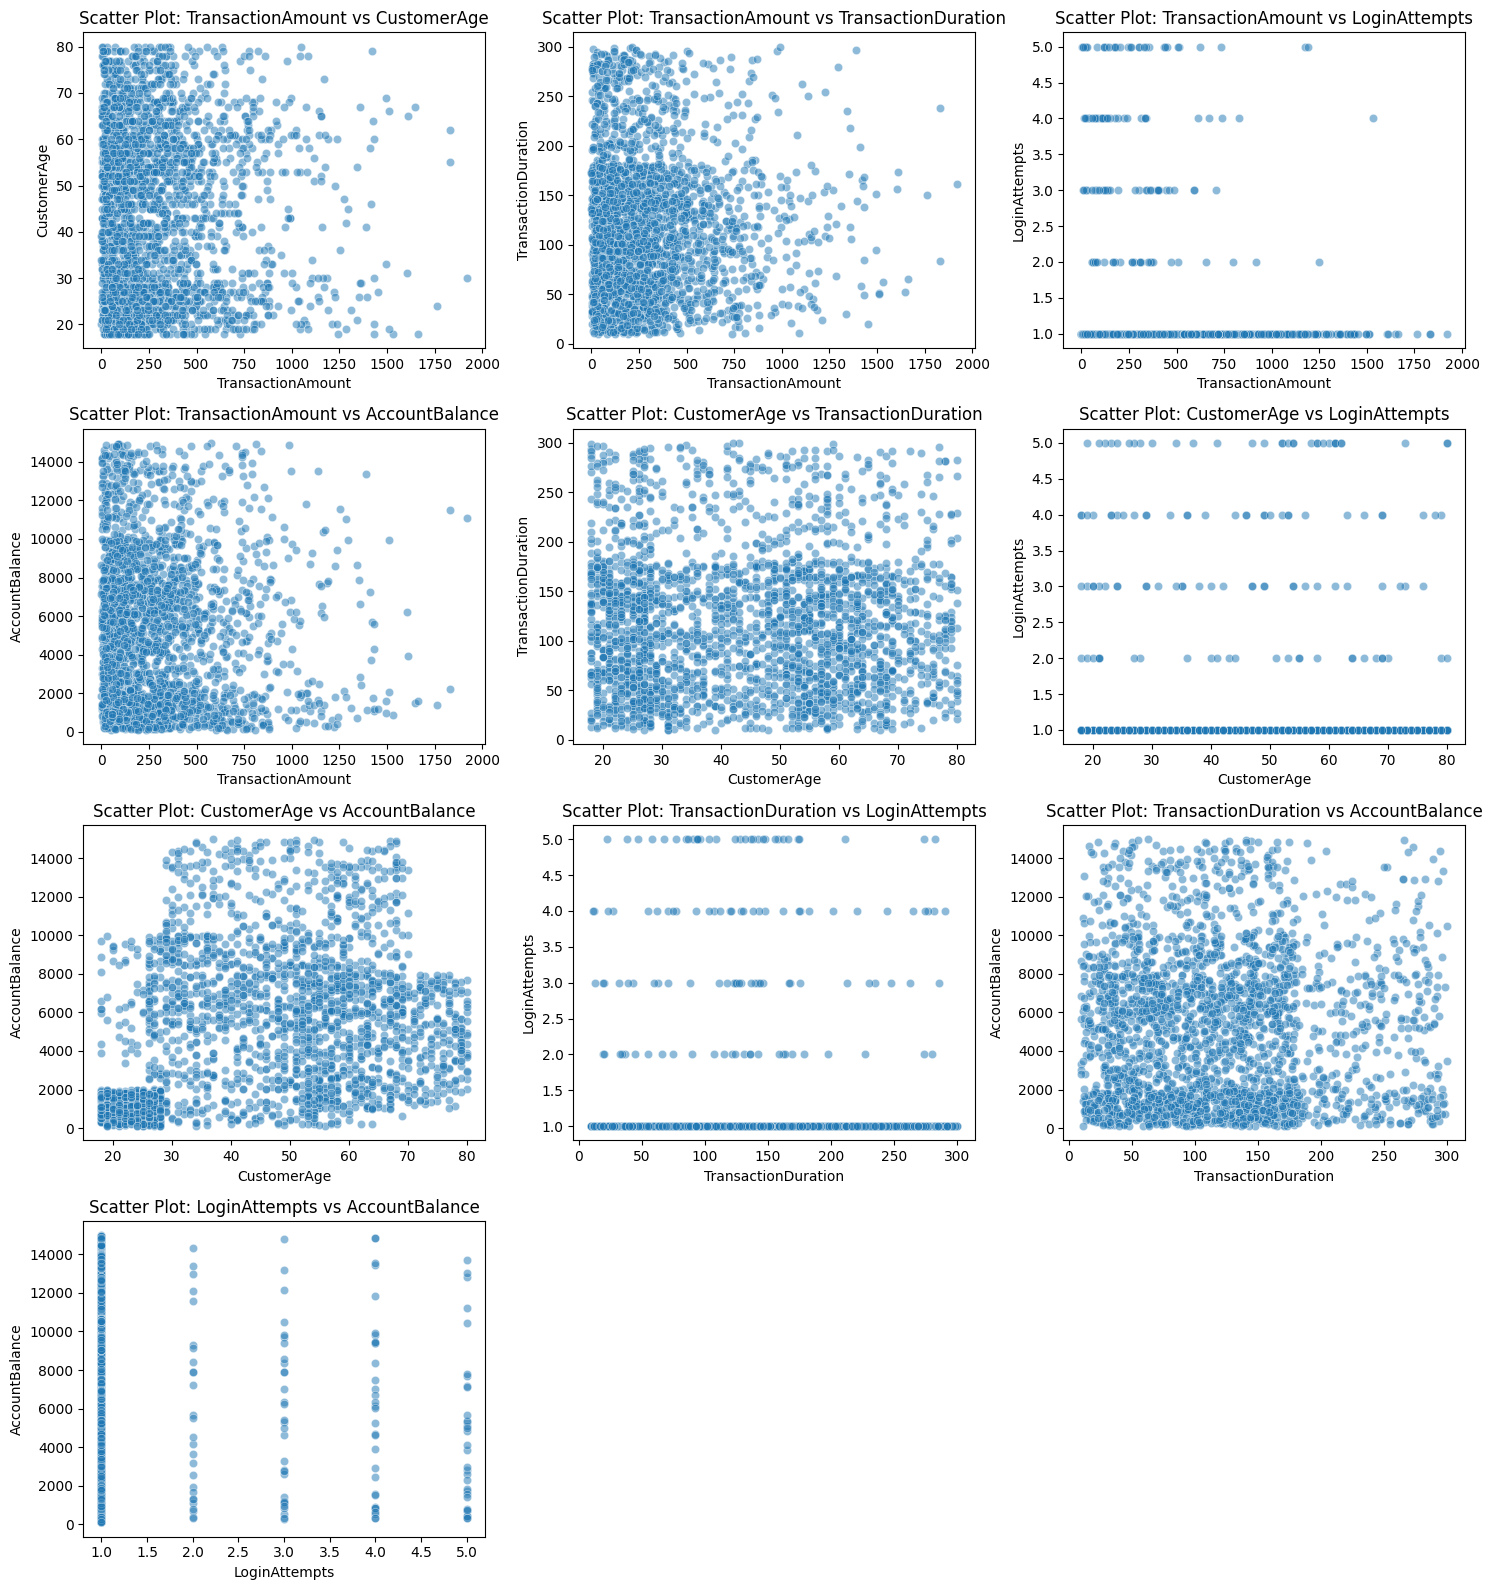

In [13]:
data_numeric = data_asli.select_dtypes(include=['float64', 'int64'])

combinations = list(itertools.combinations(data_numeric, 2))

num_plots = len(combinations)
cols = 3
rows = (num_plots // cols) + (num_plots % cols > 0)

plt.figure(figsize=(cols * 5, rows * 4))

for i, (var1, var2) in enumerate(combinations, 1):
    plt.subplot(rows, cols, i)
    sns.scatterplot(x=data_asli[var1], y=data_asli[var2], alpha=0.5)
    plt.xlabel(var1)
    plt.ylabel(var2)
    plt.title(f'Scatter Plot: {var1} vs {var2}')

plt.tight_layout()
plt.show()

### 4. Visualisasi Data

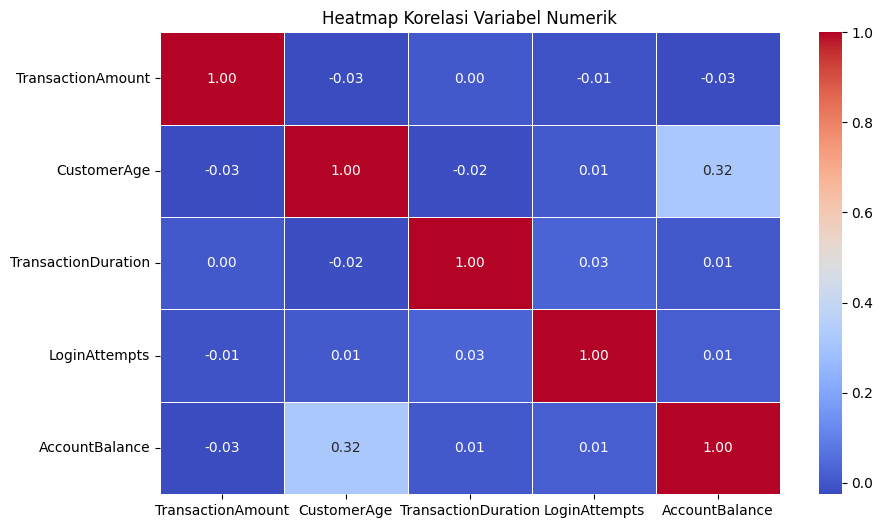

In [14]:
plt.figure(figsize=(10,6))
sns.heatmap(data_numeric.corr(), annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Heatmap Korelasi Variabel Numerik')
plt.show()

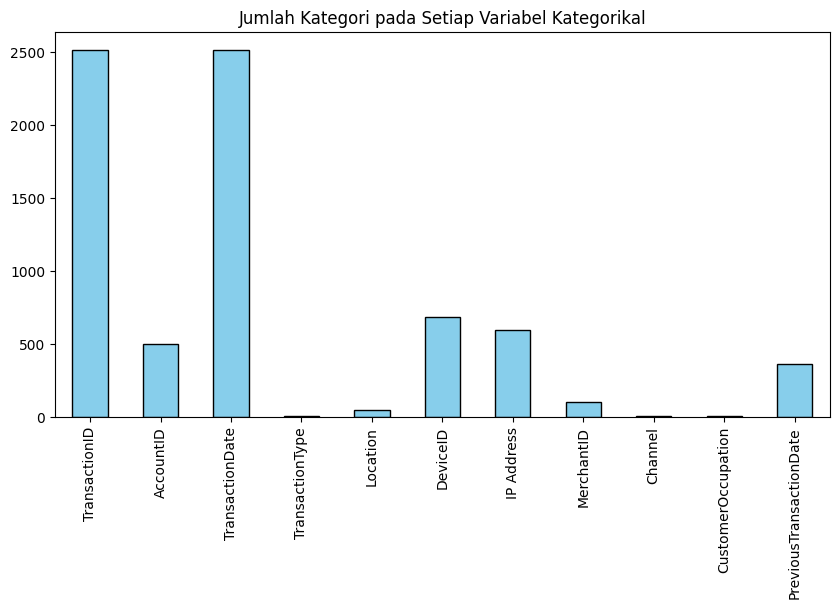

In [16]:
data_asli.select_dtypes(include=['object']).nunique().plot(kind='bar', figsize=(10, 5), color='skyblue', edgecolor='black')
plt.title('Jumlah Kategori pada Setiap Variabel Kategorikal')
plt.show()

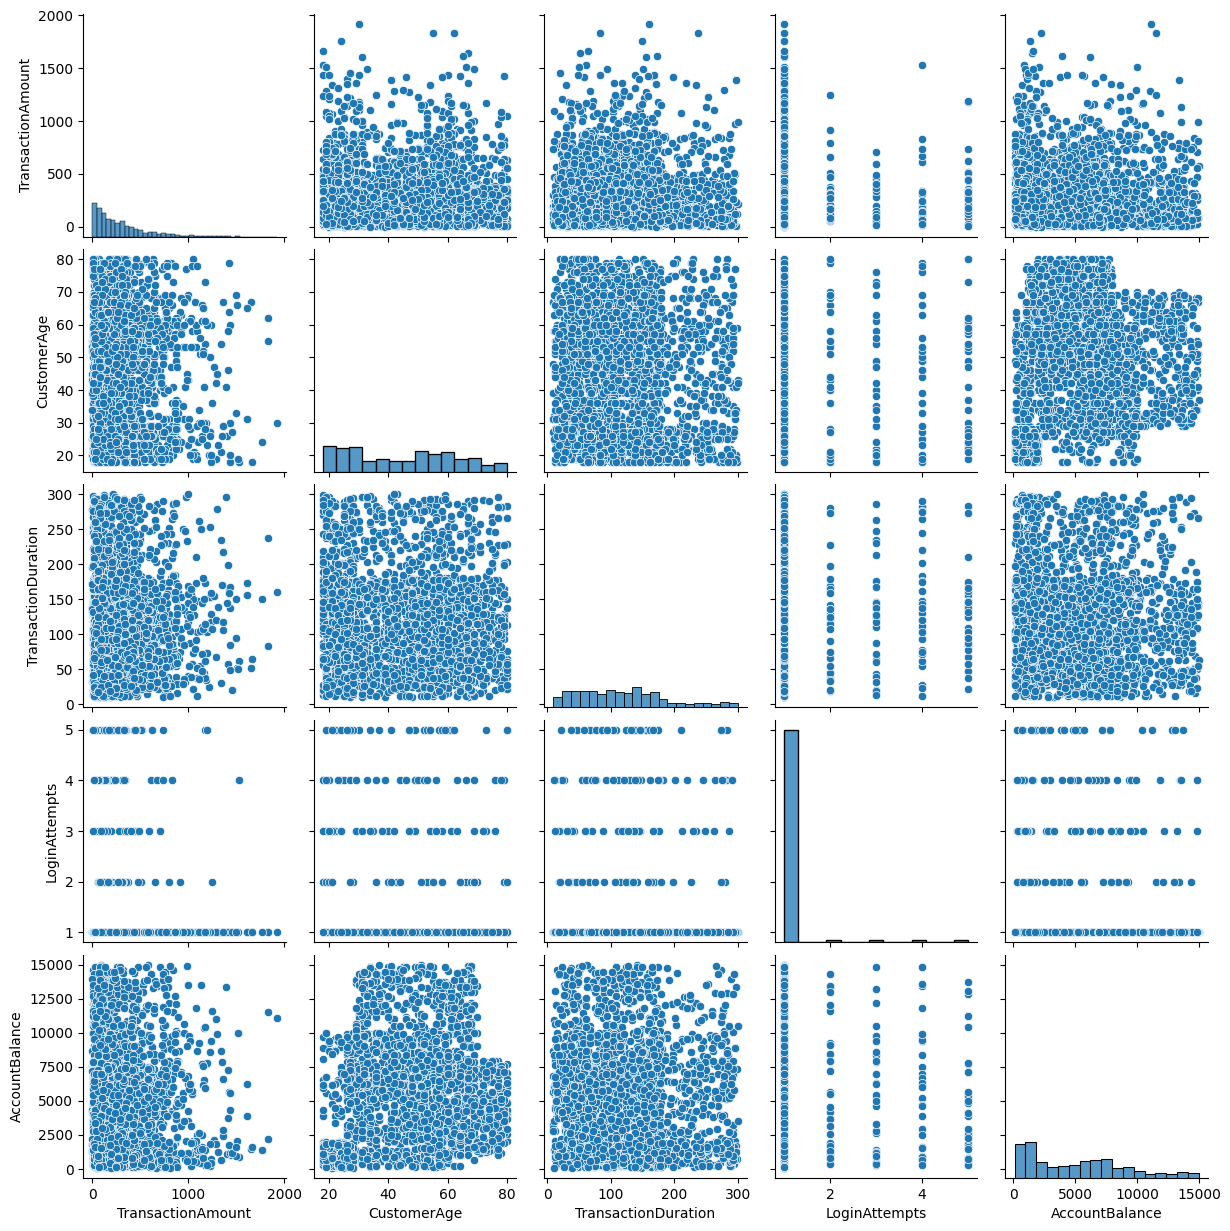

In [15]:
sns.pairplot(data_asli.select_dtypes(include=['float64', 'int64']))
plt.show()

# **5. Data Preprocessing**

Pada tahap ini, data preprocessing adalah langkah penting untuk memastikan kualitas data sebelum digunakan dalam model machine learning. Data mentah sering kali mengandung nilai kosong, duplikasi, atau rentang nilai yang tidak konsisten, yang dapat memengaruhi kinerja model. Oleh karena itu, proses ini bertujuan untuk membersihkan dan mempersiapkan data agar analisis berjalan optimal.

Berikut adalah tahapan-tahapan yang bisa dilakukan, tetapi **tidak terbatas** pada:
1. Menghapus atau Menangani Data Kosong (Missing Values)
2. Menghapus Data Duplikat
3. Normalisasi atau Standarisasi Fitur
4. Deteksi dan Penanganan Outlier
5. Encoding Data Kategorikal
6. Binning (Pengelompokan Data)

Cukup sesuaikan dengan karakteristik data yang kamu gunakan yah.

### 1. Normalisasi atau Standarisasi Fitur

In [17]:
data = data_asli.copy()

In [18]:
scaler = RobustScaler()
data[num_cols] = scaler.fit_transform(data[num_cols])

### 2. Deteksi dan Penanganan Outlier

In [19]:
z_scores = data[num_cols].apply(zscore)

threshold = 3
outliers = (np.abs(z_scores) > threshold)

outlier_counts = outliers.sum()
print("Jumlah Outlier per Kolom:\n", outlier_counts)

Jumlah Outlier per Kolom:
 TransactionAmount      48
AccountBalance          0
CustomerAge             0
TransactionDuration     0
LoginAttempts          95
dtype: int64


Terdapat beberapa outlier dan tidak terdapat penanganan outlier dikarenakan outlier memiliki makna penting, yaitu dapat merepresentasikan kejadian khusus atau informasi berharga dalam data.

### 3. Encoding Data Kategorikal

In [20]:
label_encoder = LabelEncoder()
data['Channel'] = label_encoder.fit_transform(data['Channel'])

In [21]:
label_encoder = LabelEncoder()
data['TransactionType'] = label_encoder.fit_transform(data['TransactionType'])

In [22]:
label_encoder = LabelEncoder()
data['CustomerOccupation'] = label_encoder.fit_transform(data['CustomerOccupation'])

# **6. Pembangunan Model Clustering**

## **a. Pembangunan Model Clustering**

Pada tahap ini, Anda membangun model clustering dengan memilih algoritma yang sesuai untuk mengelompokkan data berdasarkan kesamaan. Berikut adalah **rekomendasi** tahapannya.
1. Pilih algoritma clustering yang sesuai.
2. Latih model dengan data menggunakan algoritma tersebut.

In [23]:
df_clustering = data.drop(columns=['TransactionID', 'AccountID', 'TransactionDate', 'Location',
                                 'DeviceID', 'IP Address', 'MerchantID', 'PreviousTransactionDate'])

In [24]:
df_clustering.head()

,TransactionAmount,TransactionType,Channel,CustomerAge,CustomerOccupation,TransactionDuration,LoginAttempts,AccountBalance
0,-0.592378,1,0,0.78125,0,-0.321429,0.0,0.061009
1,0.496329,1,0,0.71875,0,0.290816,0.0,1.461410
2,-0.255079,1,2,-0.81250,3,-0.576531,0.0,-0.585179
3,-0.080086,1,2,-0.59375,3,-0.892857,0.0,0.620873
4,-0.594302,0,2,-0.59375,3,0.872449,0.0,0.436296


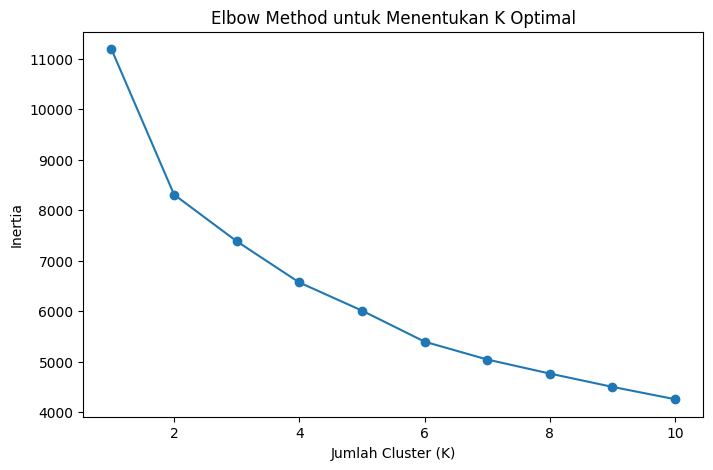

In [25]:
inertia = []
K_range = range(1, 11)

for k in K_range:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(df_clustering)
    inertia.append(kmeans.inertia_)

plt.figure(figsize=(8, 5))
plt.plot(K_range, inertia, marker='o', linestyle='-')
plt.xlabel('Jumlah Cluster (K)')
plt.ylabel('Inertia')
plt.title('Elbow Method untuk Menentukan K Optimal')
plt.show()


In [26]:
optimal_k = 4

kmeans = KMeans(n_clusters=optimal_k, random_state=42, n_init=10)
df_clustering["KMeans_Cluster"] = kmeans.fit_predict(df_clustering)

print(df_clustering["KMeans_Cluster"].value_counts())

KMeans_Cluster
3    1093
0     623
2     544
1     252
Name: count, dtype: int64


## **b. Evaluasi Model Clustering**

Untuk menentukan jumlah cluster yang optimal dalam model clustering, Anda dapat menggunakan metode Elbow atau Silhouette Score.

Metode ini membantu kita menemukan jumlah cluster yang memberikan pemisahan terbaik antar kelompok data, sehingga model yang dibangun dapat lebih efektif. Berikut adalah **rekomendasi** tahapannya.
1. Gunakan Silhouette Score dan Elbow Method untuk menentukan jumlah cluster optimal.
2. Hitung Silhouette Score sebagai ukuran kualitas cluster.

In [27]:
silhouette_avg = silhouette_score(df_clustering.drop(columns=["KMeans_Cluster"]), df_clustering["KMeans_Cluster"])

print(f"Silhouette Score untuk K={optimal_k}: {silhouette_avg:.4f}")


Silhouette Score untuk K=4: 0.2015


## **c. Feature Selection (Opsional)**

Silakan lakukan feature selection jika Anda membutuhkan optimasi model clustering. Jika Anda menerapkan proses ini, silakan lakukan pemodelan dan evaluasi kembali menggunakan kolom-kolom hasil feature selection. Terakhir, bandingkan hasil performa model sebelum dan sesudah menerapkan feature selection.

In [28]:
df_features = df_clustering.drop(columns=["KMeans_Cluster"], errors="ignore")

Fitur yang dipilih: ['CustomerAge' 'CustomerOccupation']


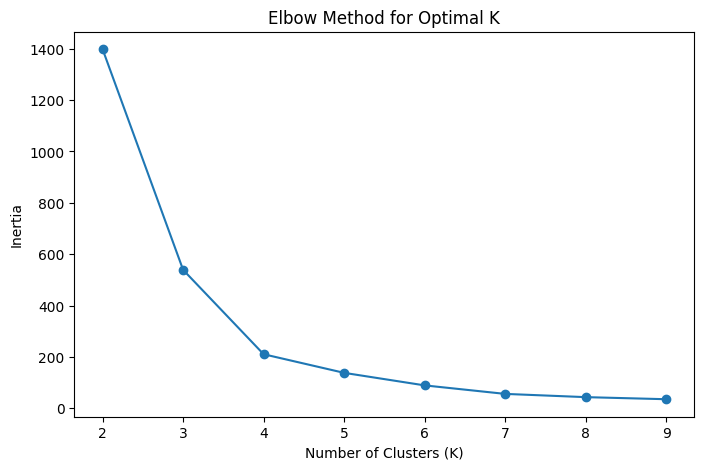

In [29]:
k_best = 2
selector = SelectKBest(score_func=f_classif, k=k_best)
df_selected = selector.fit_transform(df_features, df_clustering["KMeans_Cluster"])

selected_features = np.array(df_features.columns)[selector.get_support()]
print("Fitur yang dipilih:", selected_features)

inertia = []
K_range = range(2, 10)  # Coba K dari 2 sampai 10
for k in K_range:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(df_selected)
    inertia.append(kmeans.inertia_)

plt.figure(figsize=(8, 5))
plt.plot(K_range, inertia, marker="o", linestyle="-")
plt.xlabel("Number of Clusters (K)")
plt.ylabel("Inertia")
plt.title("Elbow Method for Optimal K")
plt.show()

In [30]:
for k in range(2, 6):
    print(f"\n=== K = {k} ===")

    selector = SelectKBest(score_func=f_classif, k=k)
    df_selected = selector.fit_transform(df_features, df_clustering["KMeans_Cluster"])

    selected_features = np.array(df_features.columns)[selector.get_support()]
    print("Fitur yang dipilih:", selected_features)

    kmeans = KMeans(n_clusters=4, random_state=42, n_init=10)
    df_clustering["KMeans_Cluster"] = kmeans.fit_predict(df_selected)

    silhouette_avg = silhouette_score(df_selected, df_clustering["KMeans_Cluster"])
    print(f"Silhouette Score untuk k={k}: {silhouette_avg:.4f}")



=== K = 2 ===
Fitur yang dipilih: ['CustomerAge' 'CustomerOccupation']
Silhouette Score untuk k=2: 0.7416

=== K = 3 ===
Fitur yang dipilih: ['CustomerAge' 'CustomerOccupation' 'AccountBalance']


/usr/local/lib/python3.11/dist-packages/sklearn/feature_selection/_univariate_selection.py:112: RuntimeWarning: divide by zero encountered in divide
  f = msb / msw


Silhouette Score untuk k=3: 0.5732

=== K = 4 ===
Fitur yang dipilih: ['TransactionType' 'CustomerAge' 'CustomerOccupation' 'AccountBalance']
Silhouette Score untuk k=4: 0.4772

=== K = 5 ===
Fitur yang dipilih: ['TransactionType' 'Channel' 'CustomerAge' 'CustomerOccupation'
 'AccountBalance']
Silhouette Score untuk k=5: 0.3215


Didapatkan clustering dengan silhouette terbaik sebesar 0.7416 pada cluster n=4 dengan feature terbaik k=2 yakni ['CustomerAge' 'Occupation_Encoded']

## **d. Visualisasi Hasil Clustering**

Setelah model clustering dilatih dan jumlah cluster optimal ditentukan, langkah selanjutnya adalah menampilkan hasil clustering melalui visualisasi.

Berikut adalah **rekomendasi** tahapannya.
1. Tampilkan hasil clustering dalam bentuk visualisasi, seperti grafik scatter plot atau 2D PCA projection.

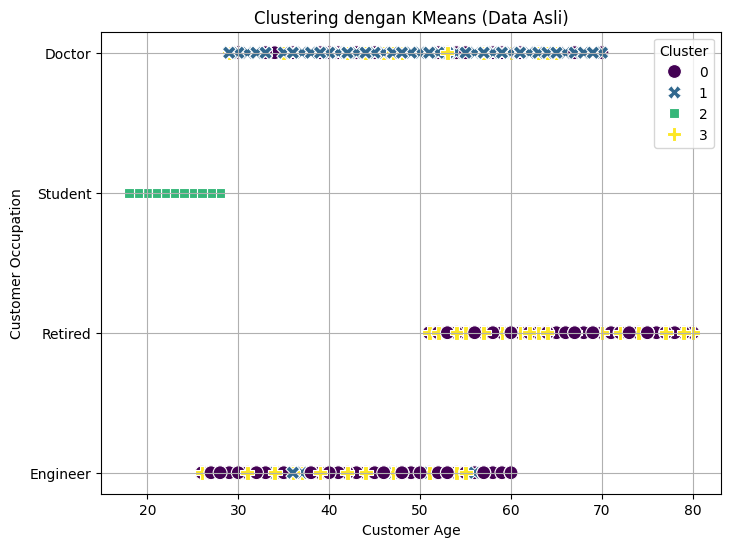

In [31]:
# Pilih fitur asli sebelum encoding/standarisasi
best_features = ['CustomerAge', 'CustomerOccupation']
df_best = df_clustering[best_features].copy()

# Tambahkan hasil clustering
df_best["Cluster"] = df_clustering["KMeans_Cluster"]

# Visualisasi scatter plot menggunakan data asli
plt.figure(figsize=(8, 6))
sns.scatterplot(
    x=data_asli["CustomerAge"],
    y=data_asli["CustomerOccupation"],
    hue=df_best["Cluster"],  # Pastikan df_best sudah benar
    palette="viridis",
    style=df_best["Cluster"],
    s=100
)

plt.xlabel("Customer Age")
plt.ylabel("Customer Occupation")
plt.title("Clustering dengan KMeans (Data Asli)")
plt.legend(title="Cluster")
plt.grid(True)
plt.show()

## **e. Analisis dan Interpretasi Hasil Cluster**

### Interpretasi Target

**Tutorial: Melakukan Inverse Transform pada Data Target Setelah Clustering**

Setelah melakukan clustering dengan model **KMeans**, kita perlu mengembalikan data yang telah diubah (normalisasi, standarisasi, atau label encoding) ke bentuk aslinya. Berikut adalah langkah-langkahnya.

---

**1. Tambahkan Hasil Label Cluster ke DataFrame**
Setelah mendapatkan hasil clustering, kita tambahkan label cluster ke dalam DataFrame yang telah dinormalisasi.

```python
df_normalized['Cluster'] = model_kmeans.labels_
```

Lakukan Inverse Transform pada feature yang sudah dilakukan Labelisasi dan Standararisasi. Berikut code untuk melakukannya:
label_encoder.inverse_transform(X_Selected[['Fitur']])

Lalu masukkan ke dalam kolom dataset asli atau membuat dataframe baru
```python
df_normalized['Fitur'] = label_encoder.inverse_transform(df_normalized[['Fitur']])
```
Masukkan Data yang Sudah Di-Inverse ke dalam Dataset Asli atau Buat DataFrame Baru
```python
df_original['Fitur'] = df_normalized['Fitur']
```

In [32]:
data['Cluster'] = kmeans.labels_

### Inverse Data Jika Melakukan Normalisasi/Standardisasi

Inverse Transform untuk Data yang Distandarisasi
Jika data numerik telah dinormalisasi menggunakan StandardScaler atau MinMaxScaler, kita bisa mengembalikannya ke skala asli:
```python
df_normalized[['Fitur_Numerik']] = scaler.inverse_transform(df_normalized[['Fitur_Numerik']])
```

In [33]:
label_encoder = LabelEncoder()
label_encoder.fit(data_asli['Channel'])
data['Channel'] = label_encoder.inverse_transform(data['Channel'])

In [34]:
label_encoder = LabelEncoder()
label_encoder.fit(data_asli['TransactionType'])
data['TransactionType'] = label_encoder.inverse_transform(data['TransactionType'])

In [35]:
label_encoder = LabelEncoder()
label_encoder.fit(data_asli['CustomerOccupation'])
data['CustomerOccupation'] = label_encoder.inverse_transform(data['CustomerOccupation'])

In [36]:
data[num_cols] = scaler.inverse_transform(data[num_cols])

In [37]:
data_clustering = data.copy()

In [38]:
data_clustering.head()

,TransactionID,AccountID,TransactionAmount,TransactionDate,TransactionType,Location,DeviceID,IP Address,MerchantID,Channel,CustomerAge,CustomerOccupation,TransactionDuration,LoginAttempts,AccountBalance,PreviousTransactionDate,Cluster
0,TX000001,AC00128,14.09,2023-04-11 16:29:14,Debit,San Diego,D000380,162.198.218.92,M015,ATM,70.0,Doctor,81.0,1.0,5112.21,2024-11-04 08:08:08,1
1,TX000002,AC00455,376.24,2023-06-27 16:44:19,Debit,Houston,D000051,13.149.61.4,M052,ATM,68.0,Doctor,141.0,1.0,13758.91,2024-11-04 08:09:35,1
2,TX000003,AC00019,126.29,2023-07-10 18:16:08,Debit,Mesa,D000235,215.97.143.157,M009,Online,19.0,Student,56.0,1.0,1122.35,2024-11-04 08:07:04,2
3,TX000004,AC00070,184.50,2023-05-05 16:32:11,Debit,Raleigh,D000187,200.13.225.150,M002,Online,26.0,Student,25.0,1.0,8569.06,2024-11-04 08:09:06,2
4,TX000005,AC00411,13.45,2023-10-16 17:51:24,Credit,Atlanta,D000308,65.164.3.100,M091,Online,26.0,Student,198.0,1.0,7429.40,2024-11-04 08:06:39,2


Setelah melakukan clustering, langkah selanjutnya adalah menganalisis karakteristik dari masing-masing cluster berdasarkan fitur yang tersedia.

Berikut adalah **rekomendasi** tahapannya.
1. Analisis karakteristik tiap cluster berdasarkan fitur yang tersedia (misalnya, distribusi nilai dalam cluster).
2. Berikan interpretasi: Apakah hasil clustering sesuai dengan ekspektasi dan logika bisnis? Apakah ada pola tertentu yang bisa dimanfaatkan?

In [39]:
cluster_summary = data_clustering.groupby("Cluster")[["TransactionAmount", "AccountBalance"]].mean()

print(cluster_summary)

         TransactionAmount  AccountBalance
Cluster                                   
0               285.380293     4811.711357
1               295.954658     9678.282410
2               313.220746     1570.209985
3               299.319858     4579.328132


In [40]:
data_clustering["Cluster"].value_counts()

,count
Cluster,
0,818
2,657
1,614
3,423


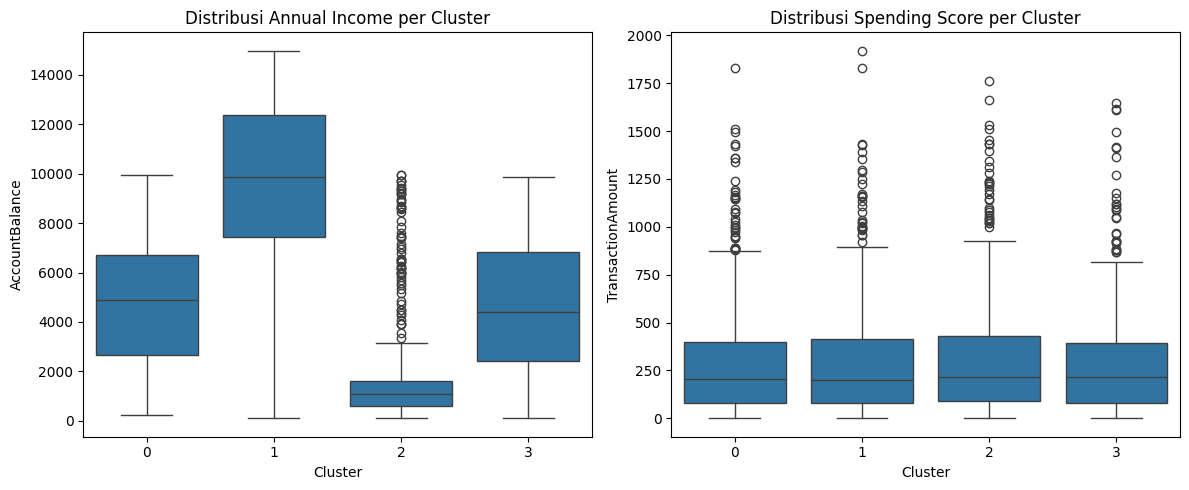

In [41]:
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
sns.boxplot(x="Cluster", y="AccountBalance", data=data_clustering)
plt.title("Distribusi Annual Income per Cluster")

plt.subplot(1, 2, 2)
sns.boxplot(x="Cluster", y="TransactionAmount", data=data_clustering)
plt.title("Distribusi Spending Score per Cluster")

plt.tight_layout()

# Contoh interpretasi [TEMPLATE]
# Analisis Karakteristik Cluster dari Model KMeans

Berikut adalah analisis karakteristik untuk setiap cluster yang dihasilkan dari model KMeans.

## Cluster 1:
- **Rata-rata Annual Income (k$):** 48,260  
- **Rata-rata Spending Score (1-100):** 56.48  
- **Analisis:** Cluster ini mencakup pelanggan dengan pendapatan tahunan menengah dan tingkat pengeluaran yang cukup tinggi. Pelanggan dalam cluster ini cenderung memiliki daya beli yang moderat dan mereka lebih cenderung untuk membelanjakan sebagian besar pendapatan mereka.

## Cluster 2:
- **Rata-rata Annual Income (k$):** 86,540  
- **Rata-rata Spending Score (1-100):** 82.13  
- **Analisis:** Cluster ini menunjukkan pelanggan dengan pendapatan tahunan tinggi dan pengeluaran yang sangat tinggi. Pelanggan di cluster ini merupakan kelompok premium dengan daya beli yang kuat dan cenderung mengeluarkan uang dalam jumlah besar untuk produk atau layanan.

## Cluster 3:
- **Rata-rata Annual Income (k$):** 87,000  
- **Rata-rata Spending Score (1-100):** 18.63  
- **Analisis:** Cluster ini terdiri dari pelanggan dengan pendapatan tahunan yang tinggi tetapi pengeluaran yang rendah. Mereka mungkin memiliki kapasitas finansial yang baik namun tidak terlalu aktif dalam berbelanja. Ini bisa menunjukkan bahwa mereka lebih selektif dalam pengeluaran mereka atau mungkin lebih cenderung untuk menyimpan uang.

## Analisis Karakteristik Cluster dari Model KMeans

1. Cluster 0:
  * Rata-rata Transaction Amount: 285.38

  * Rata-rata Account Balance: 4811.71

  * Jumlah pelanggan: 818

  * Karakteristik:
    * Mayoritas pelanggan berasal dari segmen Engineer dan Retired.

    * Rentang usia tersebar dari usia 30 hingga 80 tahun, dengan dominasi usia yang lebih tua.

    * Cluster ini terdiri dari pelanggan dengan jumlah transaksi yang relatif rendah dan saldo akun yang menengah.

    * Mereka mungkin termasuk kelompok pelanggan yang melakukan transaksi dalam jumlah kecil namun memiliki saldo yang cukup untuk transaksi yang lebih besar di masa depan.

2. Cluster 1:
  * Rata-rata Transaction Amount: 295.95

  * Rata-rata Account Balance: 9678.28

  * Jumlah pelanggan: 614

  * Karakteristik:

    * Mayoritas berasal dari segmen Doctor.

    * Rentang usia 30 hingga 80 tahun, dengan sebaran cukup merata.

    * Pelanggan dalam cluster ini memiliki saldo akun yang sangat tinggi dan jumlah transaksi yang cukup besar.

    * Mereka kemungkinan merupakan pengguna dengan daya beli tinggi, termasuk segmen premium atau pelanggan dengan kecenderungan menabung lebih banyak.

3. Cluster 2:
  * Rata-rata Transaction Amount: 313.22

  * Rata-rata Account Balance: 1570.21

  * Jumlah pelanggan: 657

  * Karakteristik:

    * Mayoritas berasal dari segmen Student.

    * Usia pelanggan berada di kisaran 20-25 tahun, yang menunjukkan mereka adalah pelanggan muda.

    * Memiliki jumlah transaksi yang relatif lebih tinggi dibandingkan dengan cluster lainnya, tetapi saldo akun tergolong paling rendah.

    * Hal ini menunjukkan bahwa pelanggan dalam cluster ini lebih sering melakukan transaksi meskipun memiliki saldo terbatas, mungkin karena mereka lebih banyak menggunakan dana yang tersedia untuk konsumsi langsung.

4. Cluster 3:
  * Rata-rata Transaction Amount: 299.32

  * Rata-rata Account Balance: 4579.33

  * Jumlah pelanggan: 423

  * Karakteristik:

    * Mayoritas berasal dari segmen Engineer dan Retired.

    * Usia pelanggan tersebar luas dari 30 hingga 80 tahun, mirip dengan Cluster 0.

    * Cluster ini memiliki jumlah transaksi yang sedang dengan saldo akun yang juga sedang.

    * Pelanggan di kelompok ini kemungkinan memiliki pola pengeluaran yang lebih stabil, tidak terlalu agresif dalam membelanjakan uang, tetapi juga tidak terlalu menabung dalam jumlah besar.

## Kesimpulan:
1. Cluster 1 (Doctor) memiliki daya beli tertinggi karena saldo akun mereka paling besar.

2. Cluster 2 (Student) memiliki frekuensi transaksi yang tinggi, tetapi saldo rendah, menunjukkan perilaku konsumsi yang berbeda dari cluster lain.

3. Cluster 0 dan Cluster 3 mirip dalam pola pengeluaran, tetapi dengan sedikit perbedaan dalam distribusi usia dan pekerjaan.

4. Dari sisi pemasaran, pendekatan yang digunakan untuk setiap cluster harus disesuaikan berdasarkan pola usia, pekerjaan, dan kebiasaan transaksi mereka.

# **7. Mengeksport Data**

Simpan hasilnya ke dalam file CSV.

In [ ]:
data_clustering.to_csv("hasil_clustering.csv", index=False)

print("File cluster_analysis.csv telah disimpan!")

File cluster_analysis.csv telah disimpan!
